In [29]:
# Re-import modified modules without restarting the server
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing Libraries

In [2]:
import os
import sys
import timeit
import warnings
from time import time
from typing import List

import openai
from dotenv import load_dotenv
from transformers import (
    GPT2LMHeadModel,
    GPT2Tokenizer,
    PreTrainedModel,
    PreTrainedTokenizer,
)

notebook_path = os.path.abspath(get_ipython().starting_dir)
parent_path = os.path.dirname(notebook_path)

sys.path.append(parent_path)
warnings.simplefilter("ignore")

In [3]:
from attribution.api_attribution import APILLMAttributor
from attribution.experiment_logger import ExperimentLogger
from attribution.attribution_metrics import (
    cosine_similarity_attribution,
    token_displacement,
    token_prob_difference,
)
from attribution.token_perturbation import FixedPerturbationStrategy, NthNearestPerturbationStrategy

## Example Usage

In [55]:
attributor = APILLMAttributor()
logger = ExperimentLogger()
attributor.compute_attributions(
    "The clock shows 9:47 PM. How many minutes 'til 10?",
    perturbation_strategy=NthNearestPerturbationStrategy(n=0),
    attribution_strategies=["prob_diff"],
    logger=logger,
    perturb_word_wise=False,
)
display(logger.df_experiments)
logger.print_sentence_attribution()
logger.print_attribution_matrix(exp_id=1, show_debug_cols=True)

,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,The clock shows 9:47 PM. How many minutes 'til...,13 minutes.,nth_nearest (n=0),False,12.841343


,exp_id,attribution_strategy,perturbation_strategy,perturb_word_wise,token_1,token_2,token_3,token_4,token_5,token_6,token_7,token_8,token_9,token_10,token_11,token_12,token_13,token_14,token_15
0,1,prob_diff,nth_nearest (n=0),False,The 0.12,clock 0.68,shows 0.72,9 0.69,: 0.71,47 0.69,PM 0.71,. 0.69,How 0.71,many 0.71,minutes 0.72,' 0.72,til 0.69,10 0.12,? 0.69


Attribution matrix for experiment 1 
Attribution Strategy: prob_diff 
Perturbation strategy: nth_nearest (n=0):
Input Tokens (Rows) vs. Output Tokens (Columns)


,13 (0),minutes (1),. (2),replacement_token,perturbed_output
The (0),0.293897,0.000050,0.062045,The,13 minutes.
clock (1),0.381101,0.999890,0.663314,clock,There are 13 minutes until 10:00 PM.
shows (2),0.503607,0.999890,0.663314,shows,There are 13 minutes until 10:00 PM.
9 (3),0.411801,0.999890,0.663314,9,There are 13 minutes until 10:00 PM.
: (4),0.460009,0.999890,0.663314,:,There are 13 minutes until 10:00 PM.
47 (5),0.411801,0.999890,0.663314,47,There are 13 minutes until 10:00 PM.
PM (6),0.460009,0.999890,0.663314,PM,There are 13 minutes until 10:00 PM.
. (7),0.411801,0.999890,0.663314,.,There are 13 minutes until 10:00 PM.
How (8),0.472584,0.999890,0.663314,How,There are 13 minutes until 10:00 PM.
many (9),0.460009,0.999890,0.663314,many,There are 13 minutes until 10:00 PM.


In [60]:
attributor = APILLMAttributor()
logger = ExperimentLogger()
attributor.compute_attributions(
    "The package weighs 8.6 kilograms. How many grams does the package weigh? No explanation.",
    perturbation_strategy=FixedPerturbationStrategy(),
    attribution_strategies=["cosine", "prob_diff", 'token_displacement'],
    logger=logger,
    perturb_word_wise=False,
)
display(logger.df_experiments)
logger.print_sentence_attribution()
logger.print_attribution_matrix(exp_id=1, show_debug_cols=True)

,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,The package weighs 8.6 kilograms. How many gra...,8600 grams.,fixed,False,11.673089


,exp_id,attribution_strategy,perturbation_strategy,perturb_word_wise,token_1,token_2,token_3,token_4,token_5,token_6,token_7,token_8,token_9,token_10,token_11,token_12,token_13,token_14,token_15,token_16,token_17,token_18,token_19
0,1,cosine,fixed,False,The 0.06,package 0.00,weighs 0.00,8 0.07,. 0.00,6 0.12,kilograms 0.00,. 0.06,How 0.02,many 0.00,grams 0.02,does 0.00,the 0.00,package 0.00,weigh 0.00,? 0.00,No 0.11,explanation 0.09,. 0.06
1,1,prob_diff,fixed,False,The 0.17,package 0.07,weighs 0.02,8 0.90,. 0.03,6 0.24,kilograms 0.03,. 0.21,How 0.79,many 0.04,grams 0.90,does 0.07,the 0.03,package 0.02,weigh 0.04,? 0.07,No 0.90,explanation 0.88,. 0.27
2,1,token_displacement,fixed,False,The 5.00,package 0.00,weighs 0.00,8 16.50,. 0.00,6 5.00,kilograms 0.00,. 5.00,How 10.50,many 0.00,grams 12.25,does 0.00,the 0.00,package 0.00,weigh 0.00,? 0.00,No 17.50,explanation 15.25,. 5.00


Attribution matrix for experiment 1 
Attribution Strategy: cosine 
Perturbation strategy: fixed:
Input Tokens (Rows) vs. Output Tokens (Columns)


,860 (0),0 (1),grams (2),. (3),replacement_token,perturbed_output
The (0),-0.000000,0.000000,0.000000,1.000000,,8600 grams
package (1),-0.000000,0.000000,0.000000,0.000000,,8600 grams.
weighs (2),-0.000000,0.000000,0.000000,0.000000,,8600 grams.
8 (3),0.541648,0.617899,0.874254,1.000000,,600 grams.
. (4),-0.000000,0.000000,0.000000,0.000000,,8600 grams.
6 (5),0.575174,0.617899,0.874254,1.000000,,8000 grams.
kilograms (6),-0.000000,0.000000,0.000000,0.000000,,8600 grams.
. (7),-0.000000,0.000000,0.000000,1.000000,,8600 grams
How (8),-0.000000,0.870681,0.617899,0.874254,,"8,600 grams"
many (9),-0.000000,0.000000,0.000000,0.000000,,8600 grams.


Attribution matrix for experiment 1 
Attribution Strategy: prob_diff 
Perturbation strategy: fixed:
Input Tokens (Rows) vs. Output Tokens (Columns)


,860 (0),0 (1),grams (2),. (3),replacement_token,perturbed_output
The (0),0.044755,0.000010,0.000007,0.653150,,8600 grams
package (1),0.136534,0.000013,0.000000,0.141338,,8600 grams.
weighs (2),0.056800,0.000052,0.000003,0.039923,,8600 grams.
8 (3),0.935722,0.999982,0.999987,0.653150,,600 grams.
. (4),0.038224,0.000295,0.000010,0.067240,,8600 grams.
6 (5),0.935722,0.000003,0.000259,0.041395,,8000 grams.
kilograms (6),0.061871,0.000583,0.023245,0.027543,,8600 grams.
. (7),0.176166,0.000013,0.000004,0.653150,,8600 grams
How (8),0.510552,0.999983,0.999987,0.653140,,"8,600 grams"
many (9),0.024700,0.000007,0.000035,0.150539,,8600 grams.


Attribution matrix for experiment 1 
Attribution Strategy: token_displacement 
Perturbation strategy: fixed:
Input Tokens (Rows) vs. Output Tokens (Columns)


,860 (0),0 (1),grams (2),. (3),replacement_token,perturbed_output
The (0),0.000000,0.000000,0.000000,20.000000,,8600 grams
package (1),0.000000,0.000000,0.000000,0.000000,,8600 grams.
weighs (2),0.000000,0.000000,0.000000,0.000000,,8600 grams.
8 (3),20.000000,6.000000,20.000000,20.000000,,600 grams.
. (4),0.000000,0.000000,0.000000,0.000000,,8600 grams.
6 (5),20.000000,0.000000,0.000000,0.000000,,8000 grams.
kilograms (6),0.000000,0.000000,0.000000,0.000000,,8600 grams.
. (7),0.000000,0.000000,0.000000,20.000000,,8600 grams
How (8),1.000000,20.000000,20.000000,1.000000,,"8,600 grams"
many (9),0.000000,0.000000,0.000000,0.000000,,8600 grams.


In [61]:
attributor = APILLMAttributor()
logger = ExperimentLogger()
attributor.compute_attributions(
    "The package weighs 8.6 kilograms. How many grams does the package weigh? No explanation.",
    perturbation_strategy=NthNearestPerturbationStrategy(n=-1),
    attribution_strategies=["cosine", "prob_diff", 'token_displacement'],
    logger=logger,
    perturb_word_wise=False,
)
display(logger.df_experiments)
logger.print_sentence_attribution()
logger.print_attribution_matrix(exp_id=1, show_debug_cols=True)

,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,The package weighs 8.6 kilograms. How many gra...,8600 grams.,nth_nearest (n=-1),False,13.336569


,exp_id,attribution_strategy,perturbation_strategy,perturb_word_wise,token_1,token_2,token_3,token_4,token_5,token_6,token_7,token_8,token_9,token_10,token_11,token_12,token_13,token_14,token_15,token_16,token_17,token_18,token_19
0,1,cosine,nth_nearest (n=-1),False,The 0.00,package 0.00,weighs 0.06,8 0.24,. 0.06,6 0.12,kilograms 0.06,. 0.06,How 0.02,many 0.06,grams 0.13,does 0.00,the 0.00,package 0.00,weigh 0.02,? 0.06,No 0.11,explanation 0.11,. 0.06
1,1,prob_diff,nth_nearest (n=-1),False,The 0.04,package 0.08,weighs 0.27,8 0.38,. 0.24,6 0.25,kilograms 0.19,. 0.16,How 0.79,many 0.17,grams 0.90,does 0.12,the 0.09,package 0.05,weigh 0.84,? 0.26,No 0.90,explanation 0.89,. 0.26
2,1,token_displacement,nth_nearest (n=-1),False,The 0.00,package 0.00,weighs 5.00,8 6.50,. 5.00,6 1.75,kilograms 5.00,. 5.00,How 11.00,many 5.00,grams 17.25,does 0.00,the 0.00,package 0.00,weigh 10.50,? 5.00,No 17.50,explanation 15.50,. 5.00


Attribution matrix for experiment 1 
Attribution Strategy: cosine 
Perturbation strategy: nth_nearest (n=-1):
Input Tokens (Rows) vs. Output Tokens (Columns)


,860 (0),0 (1),grams (2),. (3),replacement_token,perturbed_output
The (0),-0.000000,0.000000,0.000000,0.000000,Streamer,8600 grams.
package (1),-0.000000,0.000000,0.000000,0.000000,toes,8600 grams.
weighs (2),-0.000000,0.000000,0.000000,1.000000,the,8600 grams
8 (3),0.551168,0.532076,0.000000,1.000000,DERR,4600 grams
. (4),-0.000000,0.000000,0.000000,1.000000,iHUD,8600 grams
6 (5),0.575174,0.617899,0.874254,1.000000,brance,8000 grams.
kilograms (6),-0.000000,0.000000,0.000000,1.000000,and,8600 grams
. (7),-0.000000,0.000000,0.000000,1.000000,iHUD,8600 grams
How (8),-0.000000,0.870681,0.617899,0.874254,erate,"8,600 grams"
many (9),-0.000000,0.000000,0.000000,1.000000,izu,8600 grams


Attribution matrix for experiment 1 
Attribution Strategy: prob_diff 
Perturbation strategy: nth_nearest (n=-1):
Input Tokens (Rows) vs. Output Tokens (Columns)


,860 (0),0 (1),grams (2),. (3),replacement_token,perturbed_output
The (0),0.000376,0.000008,0.000003,0.143760,Streamer,8600 grams.
package (1),0.176888,0.000462,0.000025,0.142844,toes,8600 grams.
weighs (2),0.427922,0.000027,0.000002,0.641325,the,8600 grams
8 (3),0.896434,0.001501,0.000004,0.641325,DERR,4600 grams
. (4),0.244707,0.087391,0.000022,0.641325,iHUD,8600 grams
6 (5),0.939993,0.000127,0.000448,0.043723,brance,8000 grams.
kilograms (6),0.057065,0.020972,0.023198,0.641325,and,8600 grams
. (7),0.006757,0.000017,0.000047,0.641325,iHUD,8600 grams
How (8),0.532885,0.999981,0.999983,0.641323,erate,"8,600 grams"
many (9),0.031356,0.000046,0.000128,0.641325,izu,8600 grams


Attribution matrix for experiment 1 
Attribution Strategy: token_displacement 
Perturbation strategy: nth_nearest (n=-1):
Input Tokens (Rows) vs. Output Tokens (Columns)


,860 (0),0 (1),grams (2),. (3),replacement_token,perturbed_output
The (0),0.000000,0.000000,0.000000,0.000000,Streamer,8600 grams.
package (1),0.000000,0.000000,0.000000,0.000000,toes,8600 grams.
weighs (2),0.000000,0.000000,0.000000,20.000000,the,8600 grams
8 (3),6.000000,0.000000,0.000000,20.000000,DERR,4600 grams
. (4),0.000000,0.000000,0.000000,20.000000,iHUD,8600 grams
6 (5),7.000000,0.000000,0.000000,0.000000,brance,8000 grams.
kilograms (6),0.000000,0.000000,0.000000,20.000000,and,8600 grams
. (7),0.000000,0.000000,0.000000,20.000000,iHUD,8600 grams
How (8),1.000000,20.000000,20.000000,3.000000,erate,"8,600 grams"
many (9),0.000000,0.000000,0.000000,20.000000,izu,8600 grams


## Ensuring all outputs for all measured cases are the same (for the most part)

In [112]:
attributor = APILLMAttributor()
logger = ExperimentLogger()
for n in [1, 10, 100, 1000, 10000, -1]:
    print(n)
    attributor.compute_attributions(
        "The clock shows 9:47 PM. How many minutes to 10PM?",
        perturbation_strategy=NthNearestPerturbationStrategy(n),
        attribution_strategies=["cosine", "prob_diff", "token_displacement"],
        logger=logger,
        perturb_word_wise=True,
    )

print('Fixed')
attributor.compute_attributions(
        "The clock shows 9:47 PM. How many minutes to 10PM?",
        perturbation_strategy=FixedPerturbationStrategy(),
        attribution_strategies=["cosine", "prob_diff", "token_displacement"],
        logger=logger,
        perturb_word_wise=True,
    )

display(logger.df_experiments)
logger.print_sentence_attribution()

1
10
100
1000
10000
-1
Fixed


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=1),True,8.726958
1,2,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=10),True,10.689153
2,3,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=100),True,8.150015
3,4,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=1000),True,7.797201
4,5,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=10000),True,7.414774
5,6,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=-1),True,10.326219
6,7,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,fixed,True,7.200974


,exp_id,attribution_strategy,perturbation_strategy,perturb_word_wise,token_1,token_2,token_3,token_4,token_5,token_6,token_7,token_8,token_9,token_10,token_11,token_12,token_13,token_14,token_15
0,1,cosine,nth_nearest (n=1),True,The 0.00,clock 0.14,shows 0.11,9 0.10,: 0.10,47 0.10,PM 0.00,. 0.00,How 0.00,many 0.13,minutes 0.14,to 0.13,10 0.16,PM 0.16,? 0.16
1,1,prob_diff,nth_nearest (n=1),True,The 0.02,clock 0.61,shows 0.17,9 0.25,: 0.25,47 0.25,PM 0.10,. 0.10,How 0.07,many 0.60,minutes 0.72,to 0.59,10 0.69,PM 0.69,? 0.69
2,1,token_displacement,nth_nearest (n=1),True,The 0.00,clock 13.33,shows 6.67,9 6.67,: 6.67,47 6.67,PM 0.00,. 0.00,How 0.00,many 13.00,minutes 13.33,to 13.33,10 13.67,PM 13.67,? 13.67
3,2,cosine,nth_nearest (n=10),True,The 0.14,clock 0.00,shows 0.14,9 0.14,: 0.14,47 0.14,PM 0.14,. 0.14,How 0.14,many 0.00,minutes 0.21,to 0.00,10 0.15,PM 0.15,? 0.15
4,2,prob_diff,nth_nearest (n=10),True,The 0.67,clock 0.03,shows 0.58,9 0.73,: 0.73,47 0.73,PM 0.66,. 0.66,How 0.63,many 0.04,minutes 0.59,to 0.04,10 0.68,PM 0.68,? 0.68
5,2,token_displacement,nth_nearest (n=10),True,The 13.67,clock 0.00,shows 13.67,9 20.00,: 20.00,47 20.00,PM 12.67,. 12.67,How 13.67,many 0.00,minutes 7.00,to 0.00,10 14.00,PM 14.00,? 14.00
6,3,cosine,nth_nearest (n=100),True,The 0.14,clock 0.13,shows 0.00,9 0.12,: 0.12,47 0.12,PM 0.14,. 0.14,How 0.14,many 0.11,minutes 0.11,to 0.00,10 0.00,PM 0.00,? 0.00
7,3,prob_diff,nth_nearest (n=100),True,The 0.67,clock 0.68,shows 0.13,9 0.30,: 0.30,47 0.30,PM 0.64,. 0.64,How 0.72,many 0.23,minutes 0.19,to 0.10,10 0.13,PM 0.13,? 0.13
8,3,token_displacement,nth_nearest (n=100),True,The 13.00,clock 13.67,shows 0.00,9 7.00,: 7.00,47 7.00,PM 13.67,. 13.67,How 13.67,many 6.67,minutes 6.67,to 0.00,10 0.00,PM 0.00,? 0.00
9,4,cosine,nth_nearest (n=1000),True,The 0.14,clock 0.00,shows 0.14,9 0.12,: 0.12,47 0.12,PM 0.11,. 0.11,How 0.14,many 0.11,minutes 0.14,to 0.00,10 0.00,PM 0.00,? 0.00


## Debug cell

In [70]:
logger.print_attribution_matrix(exp_id=5, show_debug_cols=True)

Attribution matrix for experiment 5 
Attribution Strategy: cosine 
Perturbation strategy: nth_nearest (n=10000):
Input Tokens (Rows) vs. Output Tokens (Columns)


,There (0),would (1),be (2),(3),7 (4),eggs (5),left (6),replacement_token,perturbed_output
There (0),0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,Muslim,There would be 7 eggs left.
are (1),0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,researched,There would be 7 eggs left.
12 (2),0.000000,0.435184,0.651450,0.809004,0.807458,0.688475,0.466330,Letter,There are 7 eggs left in the dozen.
eggs (3),0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,distinguishes,There would be 7 eggs left.
in (4),0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,guarding,There would be 7 eggs left.
a (5),0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,Fry,There would be 7 eggs left.
dozen (6),0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,widerrum,There would be 7 eggs left.
. (7),0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,widerrum,There would be 7 eggs left.
If (8),0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,umably,There would be 7 eggs left.
you (9),0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,Churches,There would be 7 eggs left.


Attribution matrix for experiment 5 
Attribution Strategy: prob_diff 
Perturbation strategy: nth_nearest (n=10000):
Input Tokens (Rows) vs. Output Tokens (Columns)


,There (0),would (1),be (2),(3),7 (4),eggs (5),left (6),. (7),replacement_token,perturbed_output
There (0),0.229490,0.298773,0.000176,0.000018,0.007600,0.000024,0.000707,0.329226,Muslim,There would be 7 eggs left.
are (1),0.009155,0.196959,0.000041,0.000041,0.006803,0.000000,0.002469,0.210324,researched,There would be 7 eggs left.
12 (2),0.252164,0.551275,0.999924,0.999947,0.992325,0.999985,0.998823,0.859218,Letter,There are 7 eggs left in the dozen.
eggs (3),0.217749,0.269799,0.000373,0.000059,0.007303,0.000088,0.003216,0.084756,distinguishes,There would be 7 eggs left.
in (4),0.276027,0.085573,0.002328,0.000178,0.007457,0.000026,0.005411,0.016125,guarding,There would be 7 eggs left.
a (5),0.243819,0.060111,0.000003,0.000042,0.002379,0.000010,0.000049,0.181987,Fry,There would be 7 eggs left.
dozen (6),0.197626,0.182917,0.000048,0.000003,0.004212,0.000002,0.000118,0.243097,widerrum,There would be 7 eggs left.
. (7),0.197626,0.182917,0.000048,0.000003,0.004212,0.000002,0.000118,0.243097,widerrum,There would be 7 eggs left.
If (8),0.072995,0.309080,0.000134,0.000040,0.005732,0.000007,0.002255,0.344205,umably,There would be 7 eggs left.
you (9),0.087790,0.083396,0.000034,0.000096,0.020877,0.000027,0.000384,0.272221,Churches,There would be 7 eggs left.


Attribution matrix for experiment 5 
Attribution Strategy: token_displacement 
Perturbation strategy: nth_nearest (n=10000):
Input Tokens (Rows) vs. Output Tokens (Columns)


,There (0),would (1),be (2),(3),7 (4),eggs (5),left (6),. (7),replacement_token,perturbed_output
There (0),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Muslim,There would be 7 eggs left.
are (1),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,researched,There would be 7 eggs left.
12 (2),0.000000,1.000000,20.000000,3.000000,20.000000,20.000000,20.000000,20.000000,Letter,There are 7 eggs left in the dozen.
eggs (3),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,distinguishes,There would be 7 eggs left.
in (4),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,guarding,There would be 7 eggs left.
a (5),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Fry,There would be 7 eggs left.
dozen (6),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,widerrum,There would be 7 eggs left.
. (7),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,widerrum,There would be 7 eggs left.
If (8),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,umably,There would be 7 eggs left.
you (9),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Churches,There would be 7 eggs left.


In [33]:
logger.df_token_attribution_matrix

,exp_id,attribution_strategy,input_token_pos,output_token_pos,output_token,attr_score,replacement_token,perturbed_output
0,1,cosine,0,0,7,1.192093e-07,Sam,7 eggs
1,1,cosine,0,1,eggs,1.192093e-07,Sam,7 eggs
2,1,prob_diff,0,0,7,1.161900e-03,Sam,7 eggs
3,1,prob_diff,0,1,eggs,3.248837e-03,Sam,7 eggs
4,1,token_displacement,0,0,7,0.000000e+00,Sam,7 eggs
...,...,...,...,...,...,...,...,...
835,7,cosine,19,1,eggs,1.192093e-07,,7 eggs are left.
836,7,prob_diff,19,0,7,6.457347e-01,,7 eggs are left.
837,7,prob_diff,19,1,eggs,6.107047e-03,,7 eggs are left.
838,7,token_displacement,19,0,7,0.000000e+00,,7 eggs are left.


## Metric calculation

In [72]:
relevant_input_ids = [2, 11]
relevant_output_ids = [4]

perturbation_strategy = ['nth_nearest (n=1)', 'nth_nearest (n=10)', 'nth_nearest (n=100)', 'nth_nearest (n=1000)', 'nth_nearest (n=10000)', 'nth_nearest (n=-1)', 'fixed']
for exp_id in range(1,8):
    for attribution_strategy in ['cosine', 'prob_diff', 'token_displacement']:
        for output_id in relevant_output_ids:
            success = 0
            total = 0
            mean_attr_score = logger.df_token_attribution_matrix[(logger.df_token_attribution_matrix['exp_id'] == exp_id) & (logger.df_token_attribution_matrix['attribution_strategy'] == attribution_strategy) & (logger.df_token_attribution_matrix['output_token_pos'] == output_id)]['attr_score'].mean()
            for input_id in relevant_input_ids:
                #print(logger.df_token_attribution_matrix[(logger.df_token_attribution_matrix['exp_id'] == exp_id) & (logger.df_token_attribution_matrix['attribution_strategy'] == attribution_strategy) & (logger.df_token_attribution_matrix['output_token_pos'] == output_id)])
                attr_score = logger.df_token_attribution_matrix[(logger.df_token_attribution_matrix['exp_id'] == exp_id) & (logger.df_token_attribution_matrix['attribution_strategy'] == attribution_strategy) & (logger.df_token_attribution_matrix['output_token_pos'] == output_id) & (logger.df_token_attribution_matrix['input_token_pos'] == input_id)]['attr_score'].item()
                if attr_score > mean_attr_score:
                    success += 1
                total += 1

        print(f'Metric score for perturbation_strategy: {perturbation_strategy[exp_id-1]} and attribution_strategy: {attribution_strategy} - {success/total}')

Metric score for perturbation_strategy: nth_nearest (n=1) and attribution_strategy: cosine - 0.0
Metric score for perturbation_strategy: nth_nearest (n=1) and attribution_strategy: prob_diff - 1.0
Metric score for perturbation_strategy: nth_nearest (n=1) and attribution_strategy: token_displacement - 0.0
Metric score for perturbation_strategy: nth_nearest (n=10) and attribution_strategy: cosine - 0.0
Metric score for perturbation_strategy: nth_nearest (n=10) and attribution_strategy: prob_diff - 1.0
Metric score for perturbation_strategy: nth_nearest (n=10) and attribution_strategy: token_displacement - 1.0
Metric score for perturbation_strategy: nth_nearest (n=100) and attribution_strategy: cosine - 0.5
Metric score for perturbation_strategy: nth_nearest (n=100) and attribution_strategy: prob_diff - 1.0
Metric score for perturbation_strategy: nth_nearest (n=100) and attribution_strategy: token_displacement - 0.5
Metric score for perturbation_strategy: nth_nearest (n=1000) and attribut

In [14]:
input_strings = ['The clock shows 9:47 PM. How many minutes to 10PM?', 
                 'Maria is 37 years old today. How many years till she\'s 50?', 
                 'John has 83 books on his shelf. If he buys 17 more books, how many books will he have in total?', 
                 'The building is 132 meters tall. How many centimeters tall is the building? No explanation', 
                 'The package weighs 8.6 kilograms. How many grams does the package weigh?', 
                 'Jack has 12 teaspoons of sugar. How many tablespoons of sugar does he have?',
                'Alex saved $363 from his birthday gifts. If he spends $45 on a new game, how much money will he have left? No explanation.',
                'The building is 132 meters tall. How many centimeters tall is the building? No explanation.',
                'The thermometer reads 23 degrees Celsius. What is the temperature in Fahrenheit? No explanation.',
                'There are 12 eggs in a dozen. If you use 5 eggs, how many eggs are left?'
                ]

relevant_input_ids = [[3,5,12], 
                      [2, 13], 
                      [2, 11], 
                      [3], 
                      [2], 
                      [2], 
                      [3, 13], 
                      [3], 
                      [4], 
                      [2, 11]]

relevant_output_ids = [[0], 
                       [3], 
                       [11], 
                       [0, 2], 
                       [16, 26], 
                       [26], 
                       [1], 
                       [0, 2], 
                       [0, 2], 
                       [4]]

scores = {}
for i, string in enumerate(input_strings):
    print(f'Calculating attributions for {string}')
    logger = ExperimentLogger()
    attributor = APILLMAttributor()
    for n in [1, 10, 100, 1000, 10000, -1]:
        attributor.compute_attributions(
            string,
            perturbation_strategy=NthNearestPerturbationStrategy(n),
            attribution_strategies=["cosine", "prob_diff", "token_displacement"],
            logger=logger,
            perturb_word_wise=True,
        )

    attributor.compute_attributions(
            string,
            perturbation_strategy=FixedPerturbationStrategy(),
            attribution_strategies=["cosine", "prob_diff", "token_displacement"],
            logger=logger,
            perturb_word_wise=True,
        )
    
    input_ids = relevant_input_ids[i]
    output_ids = relevant_output_ids[i]

    perturbation_strategy = ['nth_nearest (n=1)', 'nth_nearest (n=10)', 'nth_nearest (n=100)', 'nth_nearest (n=1000)', 'nth_nearest (n=10000)', 'nth_nearest (n=-1)', 'fixed']
    for exp_id in range(1,8):
        for attribution_strategy in ['cosine', 'prob_diff', 'token_displacement']:
            for output_id in output_ids:
                success = 0
                total = 0
                mean_attr_score = logger.df_token_attribution_matrix[(logger.df_token_attribution_matrix['exp_id'] == exp_id) & (logger.df_token_attribution_matrix['attribution_strategy'] == attribution_strategy) & (logger.df_token_attribution_matrix['output_token_pos'] == output_id)]['attr_score'].mean()
                for input_id in input_ids:
                    attr_score = logger.df_token_attribution_matrix[(logger.df_token_attribution_matrix['exp_id'] == exp_id) & (logger.df_token_attribution_matrix['attribution_strategy'] == attribution_strategy) & (logger.df_token_attribution_matrix['output_token_pos'] == output_id) & (logger.df_token_attribution_matrix['input_token_pos'] == input_id)]['attr_score'].item()
                    if attr_score > mean_attr_score:
                        success += 1
                    total += 1

            if f'{perturbation_strategy[exp_id-1]}-{attribution_strategy}' in scores:
                scores[f'{perturbation_strategy[exp_id-1]}-{attribution_strategy}'] += success/total
            else:
                scores[f'{perturbation_strategy[exp_id-1]}-{attribution_strategy}'] = 0
                scores[f'{perturbation_strategy[exp_id-1]}-{attribution_strategy}'] += success/total

    display(logger.df_experiments)
        #print(f'Metric score for perturbation_strategy: {perturbation_strategy[exp_id-1]} and attribution_strategy: {attribution_strategy} - {success/total}')

Calculating attributions for The clock shows 9:47 PM. How many minutes to 10PM?


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=1),True,8.575295
1,2,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=10),True,11.924144
2,3,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=100),True,7.956939
3,4,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=1000),True,8.321909
4,5,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=10000),True,8.579864
5,6,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,nth_nearest (n=-1),True,8.853972
6,7,The clock shows 9:47 PM. How many minutes to 1...,13 minutes.,fixed,True,6.460064


Calculating attributions for Maria is 37 years old today. How many years till she's 50?


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,Maria is 37 years old today. How many years ti...,Maria is 13 years away from turning 50.,nth_nearest (n=1),True,18.357446
1,2,Maria is 37 years old today. How many years ti...,Maria is 13 years away from turning 50.,nth_nearest (n=10),True,17.18256
2,3,Maria is 37 years old today. How many years ti...,Maria is 13 years away from turning 50.,nth_nearest (n=100),True,18.474151
3,4,Maria is 37 years old today. How many years ti...,Maria is 13 years away from turning 50.,nth_nearest (n=1000),True,17.262796
4,5,Maria is 37 years old today. How many years ti...,Maria is 13 years away from turning 50.,nth_nearest (n=10000),True,19.715814
5,6,Maria is 37 years old today. How many years ti...,Maria is 13 years away from turning 50.,nth_nearest (n=-1),True,19.072984
6,7,Maria is 37 years old today. How many years ti...,Maria is 13 years away from turning 50.,fixed,True,12.110256


Calculating attributions for John has 83 books on his shelf. If he buys 17 more books, how many books will he have in total?


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,John has 83 books on his shelf. If he buys 17 ...,John will have 100 books in total. \n\n83 + 17...,nth_nearest (n=1),True,23.478735
1,2,John has 83 books on his shelf. If he buys 17 ...,John will have 83 + 17 = 100 books in total.,nth_nearest (n=10),True,23.683075
2,3,John has 83 books on his shelf. If he buys 17 ...,John will have 100 books in total. \n\n83 + 17...,nth_nearest (n=100),True,28.12703
3,4,John has 83 books on his shelf. If he buys 17 ...,John will have 83 + 17 = 100 books in total.,nth_nearest (n=1000),True,23.284441
4,5,John has 83 books on his shelf. If he buys 17 ...,John will have 100 books in total. \n\n83 + 17...,nth_nearest (n=10000),True,25.291189
5,6,John has 83 books on his shelf. If he buys 17 ...,John will have 100 books in total. \n\n83 + 17...,nth_nearest (n=-1),True,23.980555
6,7,John has 83 books on his shelf. If he buys 17 ...,John will have 100 books in total. \n\n83 + 17...,fixed,True,20.471537


Calculating attributions for The building is 132 meters tall. How many centimeters tall is the building? No explanation


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=1),True,10.85563
1,2,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=10),True,13.703259
2,3,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=100),True,13.512083
3,4,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=1000),True,12.848845
4,5,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=10000),True,13.51944
5,6,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=-1),True,14.571139
6,7,The building is 132 meters tall. How many cent...,"13,200 centimeters",fixed,True,10.152037


Calculating attributions for The package weighs 8.6 kilograms. How many grams does the package weigh?


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,The package weighs 8.6 kilograms. How many gra...,"To convert kilograms to grams, you need to mul...",nth_nearest (n=1),True,25.58722
1,2,The package weighs 8.6 kilograms. How many gra...,"To convert kilograms to grams, you need to mul...",nth_nearest (n=10),True,27.548696
2,3,The package weighs 8.6 kilograms. How many gra...,"To convert kilograms to grams, you need to mul...",nth_nearest (n=100),True,27.734604
3,4,The package weighs 8.6 kilograms. How many gra...,"To convert kilograms to grams, you need to mul...",nth_nearest (n=1000),True,22.054773
4,5,The package weighs 8.6 kilograms. How many gra...,"To convert kilograms to grams, you need to mul...",nth_nearest (n=10000),True,22.544163
5,6,The package weighs 8.6 kilograms. How many gra...,"To convert kilograms to grams, you need to mul...",nth_nearest (n=-1),True,22.700404
6,7,The package weighs 8.6 kilograms. How many gra...,"To convert kilograms to grams, you need to mul...",fixed,True,25.175807


Calculating attributions for Jack has 12 teaspoons of sugar. How many tablespoons of sugar does he have?


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,Jack has 12 teaspoons of sugar. How many table...,"There are 3 teaspoons in 1 tablespoon. \n\nSo,...",nth_nearest (n=1),True,23.231335
1,2,Jack has 12 teaspoons of sugar. How many table...,"There are 3 teaspoons in 1 tablespoon. \n\nSo,...",nth_nearest (n=10),True,21.798149
2,3,Jack has 12 teaspoons of sugar. How many table...,"There are 3 teaspoons in 1 tablespoon. \n\nSo,...",nth_nearest (n=100),True,23.751268
3,4,Jack has 12 teaspoons of sugar. How many table...,"There are 3 teaspoons in 1 tablespoon. \n\nSo,...",nth_nearest (n=1000),True,23.317843
4,5,Jack has 12 teaspoons of sugar. How many table...,"There are 3 teaspoons in 1 tablespoon. \n\nSo,...",nth_nearest (n=10000),True,24.312974
5,6,Jack has 12 teaspoons of sugar. How many table...,"There are 3 teaspoons in 1 tablespoon. \n\nSo,...",nth_nearest (n=-1),True,22.392349
6,7,Jack has 12 teaspoons of sugar. How many table...,"There are 3 teaspoons in 1 tablespoon. \n\nSo,...",fixed,True,18.790277


Calculating attributions for Alex saved $363 from his birthday gifts. If he spends $45 on a new game, how much money will he have left? No explanation.


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,Alex saved $363 from his birthday gifts. If he...,$318,nth_nearest (n=1),True,14.563359
1,2,Alex saved $363 from his birthday gifts. If he...,$318,nth_nearest (n=10),True,16.594037
2,3,Alex saved $363 from his birthday gifts. If he...,$318,nth_nearest (n=100),True,15.761194
3,4,Alex saved $363 from his birthday gifts. If he...,$318,nth_nearest (n=1000),True,14.523618
4,5,Alex saved $363 from his birthday gifts. If he...,$318,nth_nearest (n=10000),True,16.552025
5,6,Alex saved $363 from his birthday gifts. If he...,$318,nth_nearest (n=-1),True,18.167156
6,7,Alex saved $363 from his birthday gifts. If he...,$318,fixed,True,13.035536


Calculating attributions for The building is 132 meters tall. How many centimeters tall is the building? No explanation.


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=1),True,13.035436
1,2,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=10),True,13.466096
2,3,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=100),True,13.68529
3,4,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=1000),True,14.714569
4,5,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=10000),True,13.977268
5,6,The building is 132 meters tall. How many cent...,"13,200 centimeters",nth_nearest (n=-1),True,14.80499
6,7,The building is 132 meters tall. How many cent...,"13,200 centimeters",fixed,True,11.35141


Calculating attributions for The thermometer reads 23 degrees Celsius. What is the temperature in Fahrenheit? No explanation.


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,The thermometer reads 23 degrees Celsius. What...,73.4 degrees Fahrenheit,nth_nearest (n=1),True,10.728515
1,2,The thermometer reads 23 degrees Celsius. What...,73.4 degrees Fahrenheit.,nth_nearest (n=10),True,12.926324
2,3,The thermometer reads 23 degrees Celsius. What...,73.4 degrees Fahrenheit,nth_nearest (n=100),True,13.23565
3,4,The thermometer reads 23 degrees Celsius. What...,73.4 degrees Fahrenheit,nth_nearest (n=1000),True,14.100004
4,5,The thermometer reads 23 degrees Celsius. What...,73.4 degrees Fahrenheit.,nth_nearest (n=10000),True,14.236648
5,6,The thermometer reads 23 degrees Celsius. What...,73.4 degrees Fahrenheit,nth_nearest (n=-1),True,13.793816
6,7,The thermometer reads 23 degrees Celsius. What...,73.4 degrees Fahrenheit,fixed,True,12.776924


Calculating attributions for There are 12 eggs in a dozen. If you use 5 eggs, how many eggs are left?


,exp_id,original_input,original_output,perturbation_strategy,perturb_word_wise,duration
0,1,There are 12 eggs in a dozen. If you use 5 egg...,There would be 7 eggs left.,nth_nearest (n=1),True,15.292957
1,2,There are 12 eggs in a dozen. If you use 5 egg...,There would be 7 eggs left.,nth_nearest (n=10),True,16.236365
2,3,There are 12 eggs in a dozen. If you use 5 egg...,There would be 7 eggs left.,nth_nearest (n=100),True,16.093453
3,4,There are 12 eggs in a dozen. If you use 5 egg...,There would be 7 eggs left.,nth_nearest (n=1000),True,16.515403
4,5,There are 12 eggs in a dozen. If you use 5 egg...,There would be 7 eggs left.,nth_nearest (n=10000),True,15.858515
5,6,There are 12 eggs in a dozen. If you use 5 egg...,There would be 7 eggs left.,nth_nearest (n=-1),True,15.321033
6,7,There are 12 eggs in a dozen. If you use 5 egg...,There would be 7 eggs left.,fixed,True,12.593308


## Plotting results as a barplot

In [23]:
import pandas as pd

score_df = {'perturbation_strategy': ['-'.join(key.split('-')[0:-1]) for key in scores.keys()], 'attribution_strategy': [key.split('-')[-1] for key in scores.keys()], 'success': list(scores.values())}
score_df = pd.DataFrame(data=score_df, index=[i for i in range(len(scores))])

In [24]:
score_df

,perturbation_strategy,attribution_strategy,success
0,nth_nearest (n=1),cosine,7.500000
1,nth_nearest (n=1),prob_diff,8.500000
2,nth_nearest (n=1),token_displacement,8.666667
3,nth_nearest (n=10),cosine,6.000000
4,nth_nearest (n=10),prob_diff,7.500000
5,nth_nearest (n=10),token_displacement,6.666667
6,nth_nearest (n=100),cosine,7.166667
7,nth_nearest (n=100),prob_diff,8.666667
8,nth_nearest (n=100),token_displacement,8.166667
9,nth_nearest (n=1000),cosine,7.500000


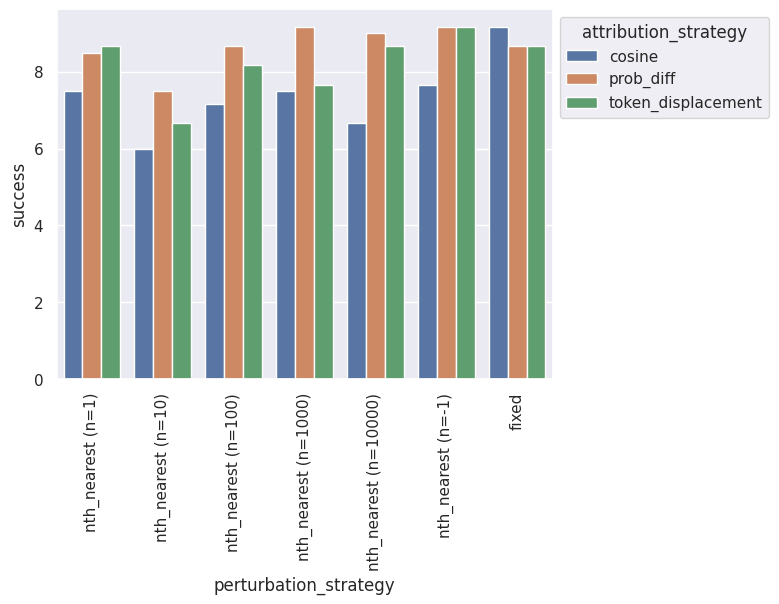

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

g = sns.barplot(data=score_df, x='perturbation_strategy', y='success', hue='attribution_strategy')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))